<a href="https://colab.research.google.com/github/rsmarinho/pdscodes/blob/master/dft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
s = lambda t, f : np.sin(2 * np.pi * f * t)

minimum sample rate: 21
sample rate: 32.0


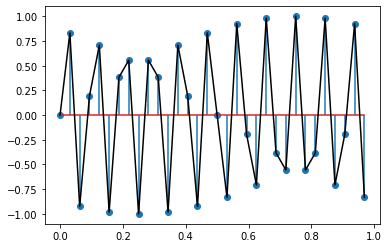

In [3]:
N = 32
start = 0
end = 1

dt = (end - start) / N

f = 11
t = np.arange(start, end, dt)
plt.stem(t, s(t, f), use_line_collection=True)
plt.plot(t, s(t, f), 'k')

sr = 1/dt
print(f'minimum sample rate: {(2 * f - 1)}')
print(f'sample rate: {sr}')

In [4]:
def dft(x, n=512):
  N = len(x)

  t = np.linspace(0, N, N)
  F = np.linspace(0, n-1, n)
  
  e = lambda f: np.exp(-1j * 2 * np.pi * f * t / N)
  
  ft = np.zeros((N, n), dtype = np.complex)
  # print(t)
  # print(F)
  for k, f in enumerate(F):
    ft[:, k] = e(f) * x

  return F, np.sum(ft, axis = 0)

<StemContainer object of 3 artists>

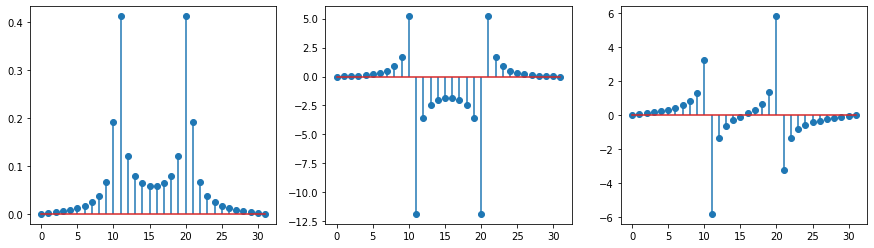

In [5]:
N1=32

f_, ft_ = dft(s(t,f), n=N1)

fig = plt.figure(figsize=(15,4))

plt.subplot(131)
plt.stem(f_, np.abs(ft_)/N, use_line_collection=True)

plt.subplot(132)
plt.stem(f_, ft_.real, use_line_collection=True)

plt.subplot(133)
plt.stem(f_, ft_.imag, use_line_collection=True)

<StemContainer object of 3 artists>

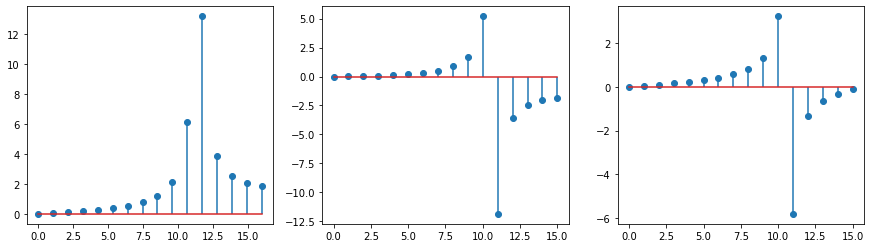

In [6]:
ft = ft_[:int(N1/2)]
ff = np.linspace(0, N1/2, int(N1/2))

fig = plt.figure(figsize=(15,4))

plt.subplot(131)
plt.stem(ff, np.abs(ft), use_line_collection=True)

plt.subplot(132)
plt.stem(ft.real, use_line_collection=True)

plt.subplot(133)
plt.stem(ft.imag, use_line_collection=True)

In [7]:
start = 0
end = 1
N = 32
time = (end - start)
dt = time / N

kf = lambda f, t : np.exp(-1j * 2 * np.pi * f * t / N)
s = lambda t, f : np.sin(2 * np.pi * f * t)

from ipywidgets import interact#, interactive, fixed, interact_manual
import ipywidgets as widgets


def plot_func(N, n, frq, end):
  fig = plt.figure(figsize=(17,8))

  time = (end - start)
  dt = time / N

  frq_f = np.linspace(0, n-1, n)
  # t = np.linspace(0, N, N)
  t = np.arange(start, end, dt)

  k = kf(frq_f, time)
  sig = s(t, frq)

# plt 1 - normalized frequency
  plt.subplot(121)
  plt.axis([-1.2, 1.2, -1.2, 1.2])
  plt.plot(k.real, k.imag)
  for i in range(n):
    plt.quiver([0], [0], k[i].real, k[i].imag, scale=2.5)

# plt 2 - time domain
  plt.subplot(222)
  plt.stem(t, sig, use_line_collection=True)
  plt.plot(t, sig, 'k')

# plt 3 - frequency domain
  plt.subplot(224)
  f_, ft_ = dft(s(t,f), n=n)
  ft = ft_[:int(n/2)+1]
  ff = f_[:int(n/2)+1]
  plt.stem(ff, np.abs(ft/n), use_line_collection=True)

In [8]:
interact(plot_func,
      N=widgets.IntSlider(min=1, max=1024, step=1, value=360),
      n=widgets.IntSlider(min=1, max=512, step=1, value=128),
      frq=widgets.IntSlider(min=1, max=32, step=1, value=11),
      end=widgets.IntSlider(min=1, max=4, step=1, value=1))

interactive(children=(IntSlider(value=360, description='N', max=1024, min=1), IntSlider(value=128, description…

<function __main__.plot_func>